# Plot critical mazes

In [1]:
import json
from itertools import product

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arrow, Circle

def plot_grid_obstacles(
    tile_array,
    ax,
    feature_colors,
    feature_label,
    ax_pad=.25/4,
    grid_lineweight=1,
):
    grid_h, grid_w = len(tile_array), len(tile_array[0])
    for side in ['top','right','bottom','left']:
        ax.spines[side].set_visible(False)
    ax.tick_params(axis='both',which='both',labelbottom=False,bottom=False, left=False, labelleft=False)
    ax.set_xlim(-ax_pad, grid_w+ax_pad)
    ax.set_ylim(-ax_pad, grid_h+ax_pad)
    ax.set_aspect('equal')
    square = Rectangle(
        (0, 0),
        grid_w, grid_h,
        color='w',
        ec='k', 
        lw=grid_lineweight
    )
    ax.add_patch(square)
    for x, y in product(range(grid_w), range(grid_h)):
        loc_feature = tile_array[grid_h - y - 1][x]
        loc_color = feature_colors.get(loc_feature, 'white')
        square = Rectangle(
            (x, y),
            1, 1,
            color=loc_color,
            ec='grey', 
            lw=grid_lineweight
        )
        ax.add_patch(square)
        
        if loc_feature == "S":
            ax.plot(
                x + .5, y + .5,
                markeredgecolor='blue',
                marker='o',
                markersize=2.5,
                markeredgewidth=.5,
                fillstyle='none'
            )
        elif loc_feature == "G":
            goal = Rectangle(
                (x + .25, y + .25),
                .5, .5,
                color='green',
                lw=0
            )
            ax.add_patch(goal)
        elif loc_feature == "#":
            pass
        else:
            text = ax.text(
                x + .5, y + .5,
                feature_label(loc_feature),
                color='w',
                ha='center',
                va='center_baseline',
                fontdict=dict(font="Arial"),
            )
            text.set_fontsize(6)

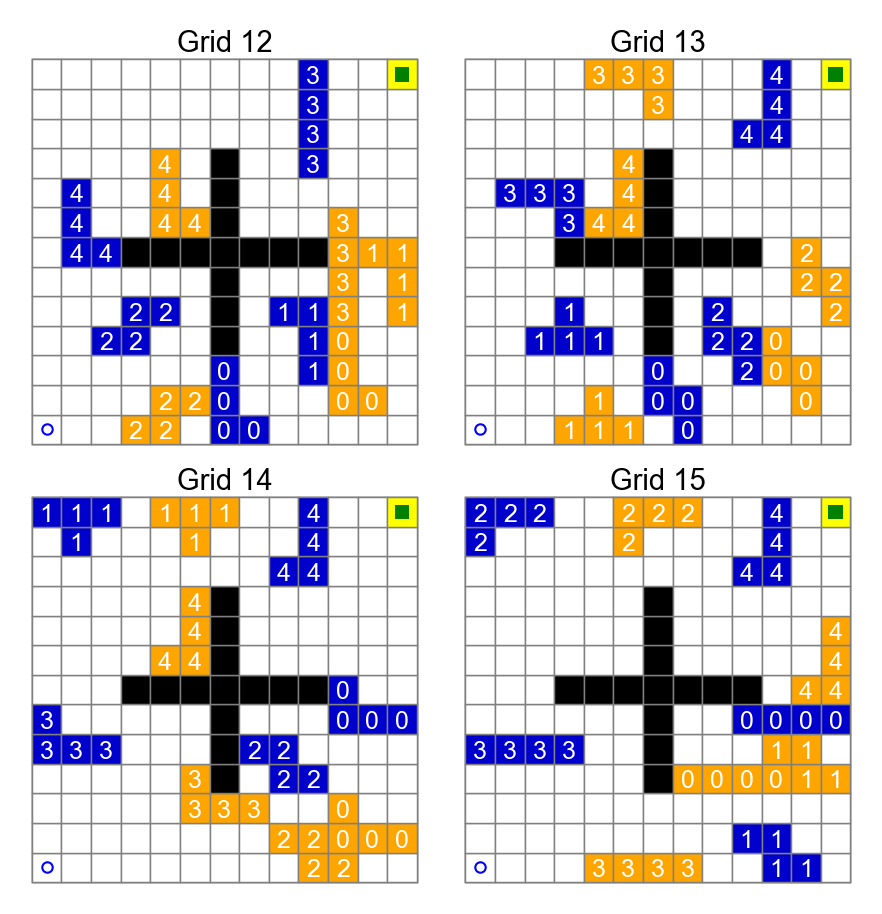

In [2]:
exp3_mod_grids = json.load(open("../experiments/mazes/mazes_12-15_mod.json"))
fig_width_mm = 80
fig_height_mm = 80
mm_to_inch = 1/25.4 
fig, axes = plt.subplots(
    2, 2, 
    figsize=(fig_width_mm*mm_to_inch, fig_height_mm*mm_to_inch),
    dpi=300
)
axes = list(axes.flatten())
for ax, (grid_name, tile_array) in zip(axes, exp3_mod_grids.items()):
    plot_grid_obstacles(
        tile_array,
        ax,
        feature_colors={
            **{o: "mediumblue" for o in "01234"},
            **{o: "orange" for o in "ABCDE"},
            'G': 'yellow',
            "#": "k"
        },
        feature_label=lambda o: "01234"["ABCDE".index(o)] if o in "ABCDE" else o,
        ax_pad=.25/4,
        grid_lineweight=.35,
    )
    title = ax.set_title(grid_name.replace("grid", "Grid").replace("-", " "), font="Arial", pad=1.5)
    title.set_fontsize(7)
plt.tight_layout(h_pad=0.5, w_pad=0.5)
fig.savefig("./results/critical_mazes.eps")